In [20]:
from novel_toy_tools.utils import generate_renditions
import polars as pl

import matplotlib.pyplot as plt
from PIL import Image


# just rename the columns to fit with my function

In [9]:
original_csv = "../data/experimental_datasets/PVMDA 7-1 Dataset/PVMDA 7-1 Frame Data Merged N = 108 1Hz.csv"
input_csv = "../data/experimental_datasets/PVMDA 7-1 Dataset/rotation_data.csv"
output_directory = "../data/experimental_datasets/PVMDA 7-1 Dataset/renditions"
object_directory = "../data/PrefViews All 3D objects"

In [14]:
dataset = pl.read_csv(original_csv, null_values=["#N/A"])
dataset

KID_IDFrameKey,KID_ID,DOE,Coder,TrialNumber,Object,Condition,FrameNumber,FrameCoding,EulerAngleX,EulerAngleY,EulerAngleZ,AzimuthElongAxis,ElevationElongAxis,AzimuthElongAxisBin,ElevationElongAxisBin,ElongAxisAngleHor,ElongAxisAngleVer,ElongAxisAngleFor,ElongAxisPosition,ElongAxisX,ElongAxisY,ElongAxisZ,FrontAxisX,FrontAxisY,FrontAxisZ,TopAxisX,TopAxisY,TopAxisZ,ObjOrientationAzimuth,ObjOrientationElevation,ObjOrientationAzimuthBin,ObjOrientationElevationBin,ObjOrientationAzimuthUDBin,ObjOrientationElevationUDBin,AngleFront,AngleTop,…,Area,Centroid_x,Centroid_y,BoundingBox_x,BoundingBox_y,BoundingBox_width,BoundingBox_weight,ConvexArea,EquivDiameter,Solidity,Eccentricity,Orientation,EulerNumber,Extent,MajorAxisLength,MinorAxisLength,FilledArea,Perimeter,pixelOverlap,PixelOverlapCorrected,AspectRatio,AspectRatioRangeNorm,AreaCopy,AreaRangeNorm,UAngleVectorsElongLoS,AngleElongLoSUncorrected,UAngleElongUpright,ElongAngleTransvPlane,UAngleVectorsTopUpright,AngleTopUprightUncorrected,ElongAxisXCopy,ElongAxisYCopy,ElongAxisZCopy,AngleElongLoSUncorrectedBin,ElongAxisAngleHorPlaneBin,BiAngleELoSHorPlaneBin,BiAngleELoSHorPlaneDesc
str,i64,str,str,i64,str,str,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,…,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,str
"""3383_20""",3383,"""8/8/01""","""MA""",1,"""Shovel""","""Known""",20,1,166.43323,-139.69881,53.82206,49.7,-53.8,10,3,116.8,36.2,112.4,0,-0.45019,0.80719,0.38181,-0.45019,0.80719,0.38181,0.48435,-0.13847,0.86385,-130.7,59.8,2,8,2,11,112.4,-149.8,…,32903,621.270401,455.286904,478.5,266.5,287,424,50084,204.678775,0.656956,0.981872,-62.312467,0,0.270388,568.075195,107.674552,33496,1138.364,0,0,5.275854,0.482831,32903,0.972565,112.445843,67.554157,36.177712,53.822288,97.959321,82.040679,-0.45019,0.80719,0.38181,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_21""",3383,"""3/27/00""","""MA""",1,"""Shovel""","""Known""",21,1,-146.4509,174.74855,60.71553,95.3,-60.7,12,2,119.1,29.3,87.4,0,-0.48709,0.8722,-0.04477,-0.48709,0.8722,-0.04477,0.40372,0.27033,0.87403,174.7,60.9,16,8,16,8,87.4,-150.9,…,31360,631.322034,474.63192,479.5,270.5,299,440,50815,199.821901,0.617141,0.985446,-61.867709,0,0.23837,597.972602,101.649499,32515,1182.573,28299,28299,5.882691,0.551945,31360,0.916643,87.43401,87.43401,29.284691,60.715309,74.316095,74.316095,-0.48709,0.8722,-0.04477,3,3,"""L[60, 90]_H[60, 90]""","""Expanded_Vertical"""
"""3383_22""",3383,"""3/19/00""","""MA""",1,"""Shovel""","""Known""",22,1,-136.33371,159.18131,59.4225,110.8,-59.4,13,2,118.4,30.6,79.6,0,-0.47549,0.86094,-0.1808,-0.47549,0.86094,-0.1808,0.29854,0.35124,0.88742,156.9,62.6,15,8,15,8,79.6,-152.6,…,30493,636.175057,483.736792,484.5,277.5,296,432,50202,197.040335,0.607406,0.984936,-62.223973,0,0.238465,587.569415,101.600864,31693,1176.858,29856,29856,5.783114,0.540604,30493,0.88522,79.583639,79.583639,30.57771,59.42229,69.436822,69.436822,-0.47549,0.86094,-0.1808,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_25""",3383,"""3/17/00""","""MA""",1,"""Shovel""","""Known""",25,1,-144.06812,164.43602,36.79765,105.6,-36.8,13,3,140.5,53.2,77.6,0,-0.77139,0.59899,-0.21485,-0.77139,0.59899,-0.21485,0.12135,0.4699,0.87434,153.7,61.0,15,8,15,8,77.6,-151.0,…,30083,635.433401,487.484061,432.5,318.5,405,341,49719,195.711178,0.60506,0.984331,-39.021051,0,0.217827,578.007925,101.91993,31247,1172.442,10965,10965,5.671196,0.527858,30083,0.870361,77.593273,77.593273,53.202404,36.797596,61.972194,61.972194,-0.77139,0.59899,-0.21485,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_26""",3383,"""3/8/00""","""MA""",1,"""Shovel""","""Known""",26,1,-130.36304,154.19096,32.6282,115.8,-32.6,13,4,139.3,57.4,68.5,0,-0.75818,0.53919,-0.36667,-0.75818,0.53919,-0.36667,0.08789,0.64171,0.76189,145.5,49.6,14,7,14,7,68.5,-139.6,…,27937,641.93267,492.764398,437.5,338.5,400,306,45894,188.601413,0.60

In [16]:
dataset = dataset.with_columns(pl.col('KID_IDFrameKey') + "_" + pl.col('Object'))
dataset_conformed = dataset.rename({"EulerAngleX": "Euler_X", "EulerAngleY": "Euler_Y", "EulerAngleZ": "Euler_Z"})

In [17]:
dataset_conformed

KID_IDFrameKey,KID_ID,DOE,Coder,TrialNumber,Object,Condition,FrameNumber,FrameCoding,Euler_X,Euler_Y,Euler_Z,AzimuthElongAxis,ElevationElongAxis,AzimuthElongAxisBin,ElevationElongAxisBin,ElongAxisAngleHor,ElongAxisAngleVer,ElongAxisAngleFor,ElongAxisPosition,ElongAxisX,ElongAxisY,ElongAxisZ,FrontAxisX,FrontAxisY,FrontAxisZ,TopAxisX,TopAxisY,TopAxisZ,ObjOrientationAzimuth,ObjOrientationElevation,ObjOrientationAzimuthBin,ObjOrientationElevationBin,ObjOrientationAzimuthUDBin,ObjOrientationElevationUDBin,AngleFront,AngleTop,…,Area,Centroid_x,Centroid_y,BoundingBox_x,BoundingBox_y,BoundingBox_width,BoundingBox_weight,ConvexArea,EquivDiameter,Solidity,Eccentricity,Orientation,EulerNumber,Extent,MajorAxisLength,MinorAxisLength,FilledArea,Perimeter,pixelOverlap,PixelOverlapCorrected,AspectRatio,AspectRatioRangeNorm,AreaCopy,AreaRangeNorm,UAngleVectorsElongLoS,AngleElongLoSUncorrected,UAngleElongUpright,ElongAngleTransvPlane,UAngleVectorsTopUpright,AngleTopUprightUncorrected,ElongAxisXCopy,ElongAxisYCopy,ElongAxisZCopy,AngleElongLoSUncorrectedBin,ElongAxisAngleHorPlaneBin,BiAngleELoSHorPlaneBin,BiAngleELoSHorPlaneDesc
str,i64,str,str,i64,str,str,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,…,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,str
"""3383_20_Shovel""",3383,"""8/8/01""","""MA""",1,"""Shovel""","""Known""",20,1,166.43323,-139.69881,53.82206,49.7,-53.8,10,3,116.8,36.2,112.4,0,-0.45019,0.80719,0.38181,-0.45019,0.80719,0.38181,0.48435,-0.13847,0.86385,-130.7,59.8,2,8,2,11,112.4,-149.8,…,32903,621.270401,455.286904,478.5,266.5,287,424,50084,204.678775,0.656956,0.981872,-62.312467,0,0.270388,568.075195,107.674552,33496,1138.364,0,0,5.275854,0.482831,32903,0.972565,112.445843,67.554157,36.177712,53.822288,97.959321,82.040679,-0.45019,0.80719,0.38181,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_21_Shovel""",3383,"""3/27/00""","""MA""",1,"""Shovel""","""Known""",21,1,-146.4509,174.74855,60.71553,95.3,-60.7,12,2,119.1,29.3,87.4,0,-0.48709,0.8722,-0.04477,-0.48709,0.8722,-0.04477,0.40372,0.27033,0.87403,174.7,60.9,16,8,16,8,87.4,-150.9,…,31360,631.322034,474.63192,479.5,270.5,299,440,50815,199.821901,0.617141,0.985446,-61.867709,0,0.23837,597.972602,101.649499,32515,1182.573,28299,28299,5.882691,0.551945,31360,0.916643,87.43401,87.43401,29.284691,60.715309,74.316095,74.316095,-0.48709,0.8722,-0.04477,3,3,"""L[60, 90]_H[60, 90]""","""Expanded_Vertical"""
"""3383_22_Shovel""",3383,"""3/19/00""","""MA""",1,"""Shovel""","""Known""",22,1,-136.33371,159.18131,59.4225,110.8,-59.4,13,2,118.4,30.6,79.6,0,-0.47549,0.86094,-0.1808,-0.47549,0.86094,-0.1808,0.29854,0.35124,0.88742,156.9,62.6,15,8,15,8,79.6,-152.6,…,30493,636.175057,483.736792,484.5,277.5,296,432,50202,197.040335,0.607406,0.984936,-62.223973,0,0.238465,587.569415,101.600864,31693,1176.858,29856,29856,5.783114,0.540604,30493,0.88522,79.583639,79.583639,30.57771,59.42229,69.436822,69.436822,-0.47549,0.86094,-0.1808,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_25_Shovel""",3383,"""3/17/00""","""MA""",1,"""Shovel""","""Known""",25,1,-144.06812,164.43602,36.79765,105.6,-36.8,13,3,140.5,53.2,77.6,0,-0.77139,0.59899,-0.21485,-0.77139,0.59899,-0.21485,0.12135,0.4699,0.87434,153.7,61.0,15,8,15,8,77.6,-151.0,…,30083,635.433401,487.484061,432.5,318.5,405,341,49719,195.711178,0.60506,0.984331,-39.021051,0,0.217827,578.007925,101.91993,31247,1172.442,10965,10965,5.671196,0.527858,30083,0.870361,77.593273,77.593273,53.202404,36.797596,61.972194,61.972194,-0.77139,0.59899,-0.21485,3,2,"""L[60, 90]_H[30, 60[""","""Ignore"""
"""3383_26_Shovel""",3383,"""3/8/00""","""MA""",1,"""Shovel""","""Known""",26,1,-130.36304,154.19096,32.6282,115.8,-32.6,13,4,139.3,57.4,68.5,0,-0.75818,0.53919,-0.36667,-0.75818,0.53919,-0.36667,0.08789,0.64171,0.76189,145.5,49.6,14,7,14,7,68.5,-139.6,…,27937,641.93267,492.764398,437.5,338.5,400,30

In [18]:
dataset_conformed.write_csv(input_csv)


In [19]:
generate_renditions(input_csv, output_directory, object_directory)

Saving renditions to ../data/experimental_datasets/PVMDA 7-1 Dataset/renditions


Generating Renditions: 100%|██████████| 18397/18397 [01:29<00:00, 205.40it/s]


/tmp/ipykernel_2617/3296706434.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


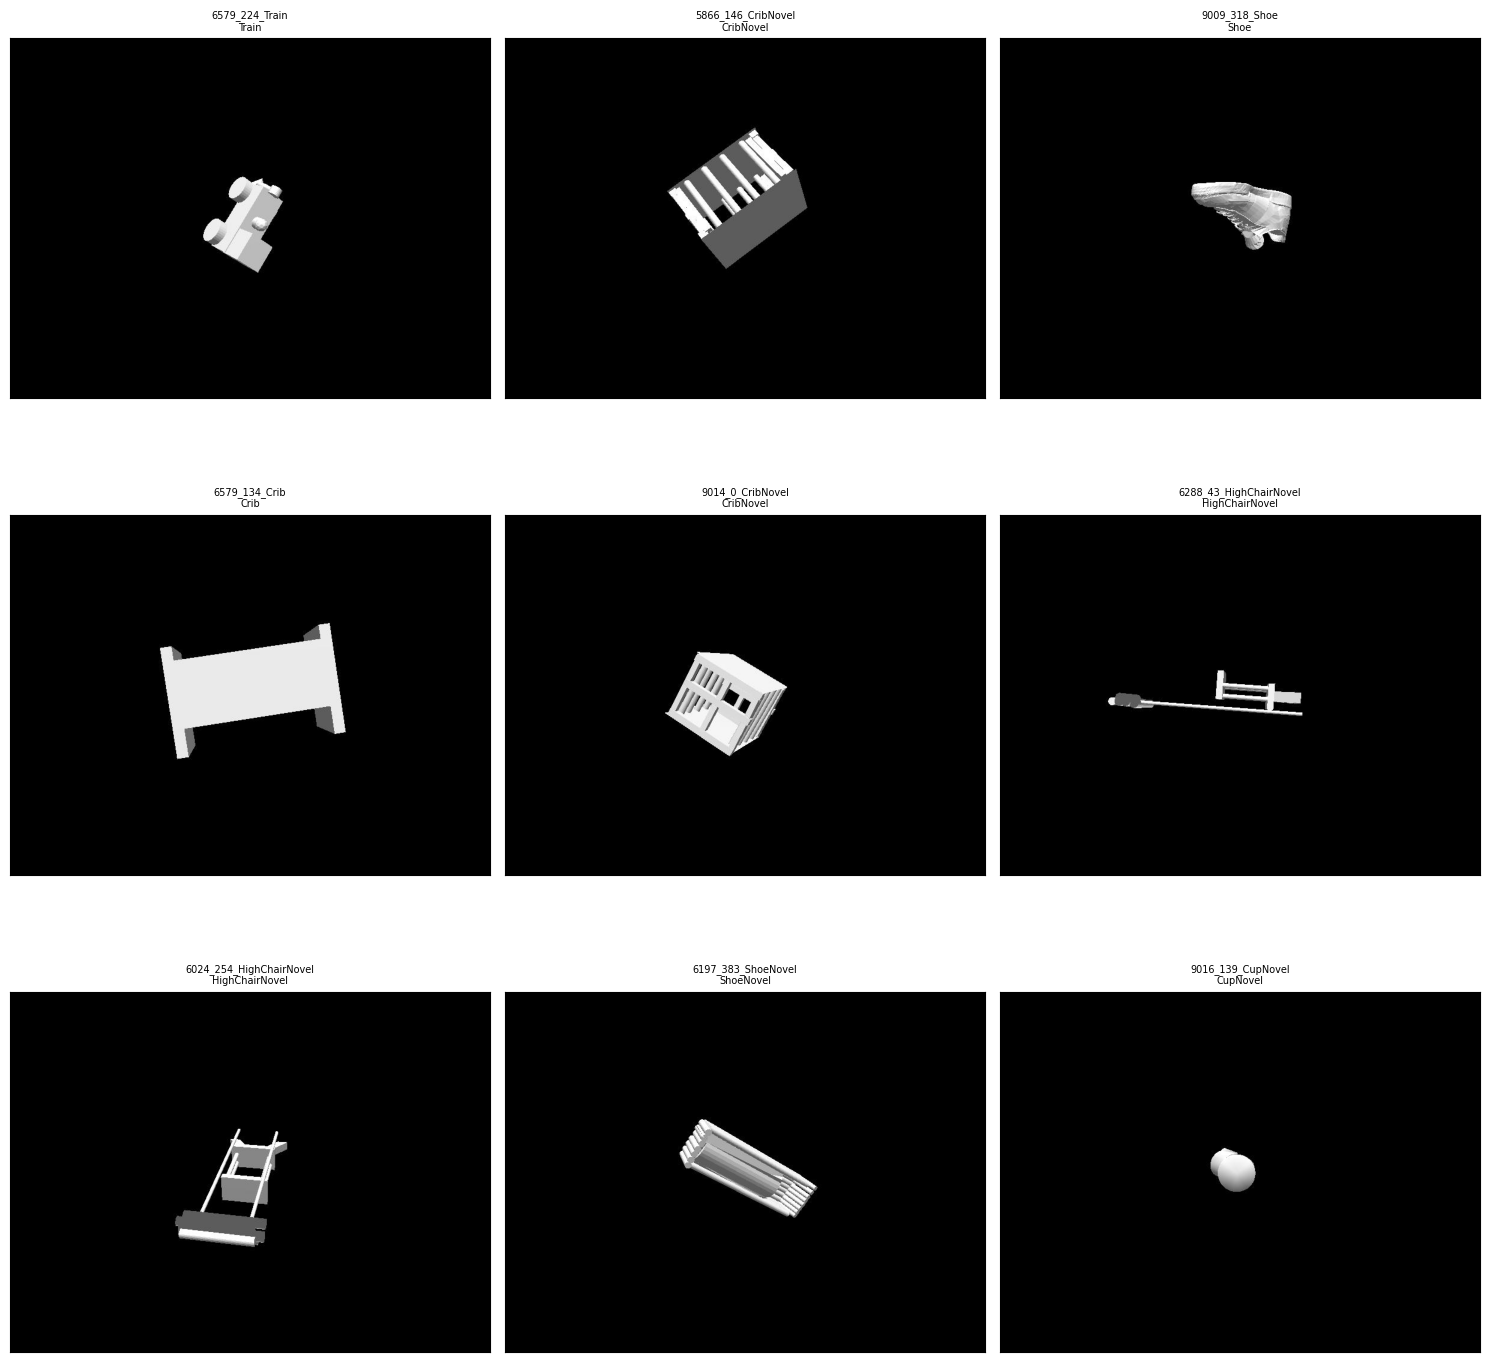

In [46]:
image_path_prefix = "../data/experimental_datasets/PVMDA 7-1 Dataset/renditions/rendition_"

sample = dataset_conformed.sample(3*3, shuffle=True)
fig, ax = plt.subplots(3,3, figsize=(15,15))
ax = ax.flatten()
for axis, row in zip(ax, sample.iter_rows(named=True)):
    image = Image.open(image_path_prefix + row['KID_IDFrameKey'] + ".jpg")
    axis.imshow(image)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_title(f"{row['KID_IDFrameKey']}\n{row['Object']}", fontsize=7)
fig.show()
fig.tight_layout()